In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('Final_DF.csv')
data_copy = data.copy()

In [ ]:
# Label encoding the specified columns
label_encoder = LabelEncoder()
for col in ['trx_type', 'trx_status', 'business_type_class']:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

In [ ]:
numerical_features = data_copy[['trx_status','business_type_class','wallet_number_from','wallet_number_to','amount','hour','day_of_week','Wallet_to_change_frequency','IP Change Frequency','Days Since First Transaction','Transaction Count','Transaction Frequency','Adjusted Account Age','lat','long']]

In [ ]:
# Splitting the data into features (X) and the target variable (y)
X = numerical_features
y = data_copy['flagged']

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the range of values for the number of neighbors (K)
neighbours = np.arange(1, 8)

# Initializing arrays to store accuracy scores
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# Iterating over each value of K
for i, k in enumerate(neighbours):
    # Setting up a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs=-1)

    # Fitting the model
    knn.fit(X_train_scaled, y_train)

    # Computing accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)

    # Computing accuracy on the test set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

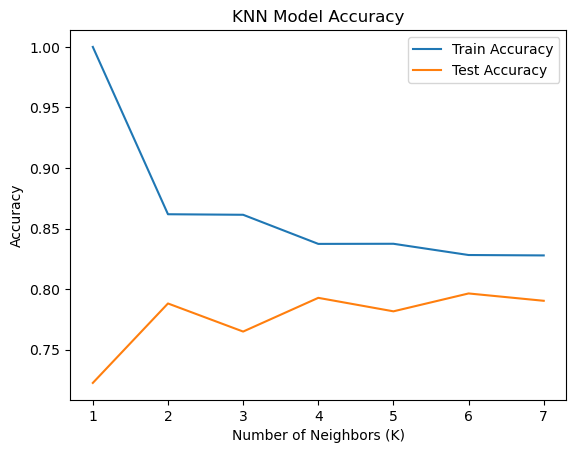

In [ ]:
# Plotting the training and test accuracy scores
plt.plot(neighbours, train_accuracy, label='Train Accuracy')
plt.plot(neighbours, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy')
plt.legend()
plt.show()

In [ ]:
x = neighbours[np.argmax(test_accuracy)]
x

6

In [ ]:
#k_nearest_neighbours_classification
knn = KNeighborsClassifier(n_neighbors=x, algorithm="kd_tree", n_jobs=-1)
knn.fit(X_train, y_train.ravel())

/var/folders/br/dkj4kpjn3cj4p1wfx81n_hpw0000gn/T/ipykernel_8466/3539192829.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn.fit(X_train, y_train.ravel())


KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=6)

In [ ]:
# Predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

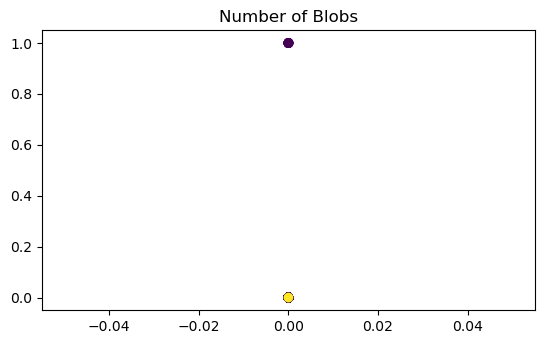

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

# Assuming X_test is a pandas DataFrame, you can convert it to a numpy array
X_test_np = X_test.to_numpy()

# Plotting
plt.subplot(222)
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=knn_predicted_test_labels)
plt.title("Number of Blobs")
plt.show()

In [ ]:
# Calculating the AUC score
auc_score = roc_auc_score(y_test, knn_predicted_test_labels)
print("AUC Score:", auc_score)

AUC Score: 0.6429075134365605


In [ ]:
#Scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [ ]:
#Printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.7906433109868496
Precison --> 0.8170042851577717
Recall --> 0.3125558867362146
F1 --> 0.45213970033415973
MCC --> 0.41567287306744005
              precision    recall  f1-score   support

       False       0.79      0.97      0.87     70267
        True       0.82      0.31      0.45     26840

    accuracy                           0.79     97107
   macro avg       0.80      0.64      0.66     97107
weighted avg       0.80      0.79      0.75     97107

